In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
from collections import defaultdict
from collections import Counter 
#import seaborn as sns

In [2]:
# Import the test and train Dataset 

test = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\test.csv')
train = pd.read_csv('D:\HATHWAY ISP\DSC\Project\Housing\\train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Drop the Unwanted Feature STEP 1 
# ID ( columns/Feature ) has no meaning in the Given. So we drop this Feature 

train.drop('Id', axis = 1, inplace = True)

In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


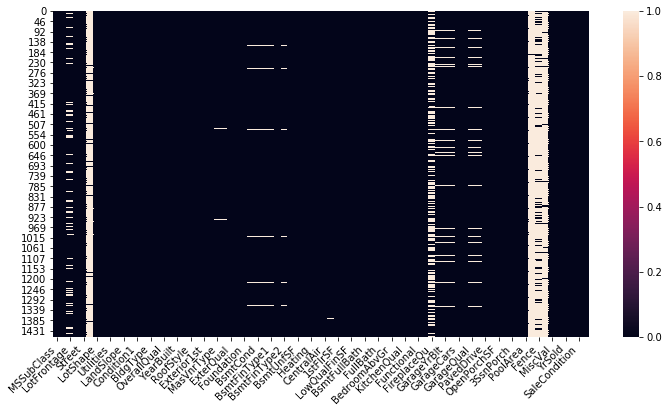

In [13]:
## Is there any missing value in our DataSet 
## In Below Graph we can clearly see the missing values [ in white ]

plt.figure(figsize=(12, 6))
ax = sns.heatmap(train.isnull())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');
plt.show()

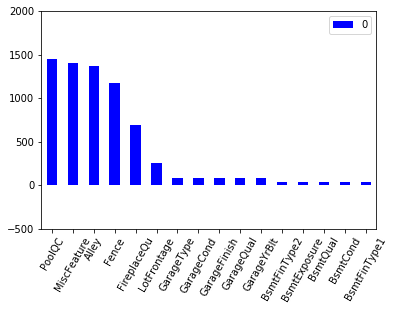

In [14]:
# Plot the Graph of Missing Values those have higher % of Missing Values 

train_no_missing = train.isnull().sum().sort_values(ascending=False)[train.isnull().sum() > 10 ]
pd.DataFrame(train_no_missing).plot(kind='bar',rot=60, ylim=[-500,2000], xlim=[0,100], color='b')

In [15]:
# Below Chart shows Features with Missing values Percentages [ % ]
train.isnull().sum().sort_values(ascending=False)[train.isnull().sum() > 10 ] /1460 *100

PoolQC          99.315068
MiscFeature     95.958904
Alley           93.493151
Fence           80.479452
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
dtype: float64

In [16]:
# Drop the Unwanted Features STEP 2
# We will Drop the Features contains more than 10% missing Values 

Unwanted_features = ['PoolQC', 'MiscFeature', 'Fence', 'Alley', 'FireplaceQu', 'LotFrontage']

for Unwanted_feature in Unwanted_features:
    train.drop(Unwanted_feature, axis = 1, inplace = True)


In [17]:
# Below Chart Shows missing Value in Percentages [ % ] 
train.isnull().sum().sort_values(ascending=False)[train.isnull().sum() > 10 ] /1460 *100

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
dtype: float64

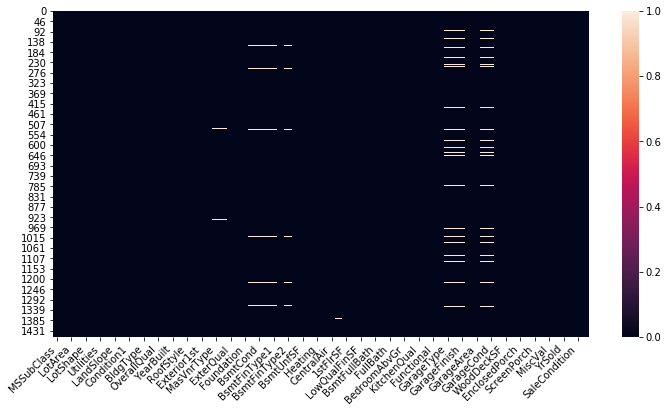

In [18]:
# Now we Can see Missing Value distribution as below by Ploting Heatmap again 
plt.figure(figsize=(12, 6))
ax = sns.heatmap(train.isnull())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');
plt.show()

In [19]:
# Missing Value treatment for Categorical features 
# For Categorical Feature we will fill the missing value with mode 
feature = list(train.describe(include = ['O']).columns)
print(feature)
for i in feature :
    CO = Counter(train[i])
    data , count = (CO.most_common(1)[0])
    train[i] = train[i].fillna(data)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [20]:
# For Numerical Feature we will fill the missing value with mean
feature = list(train.describe(exclude = ['O']).columns)
print(feature)

for i in feature :
    if i != 'GarageYrBlt' :
        train[i] = train[i].fillna(train[i].mean) 
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(1984)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


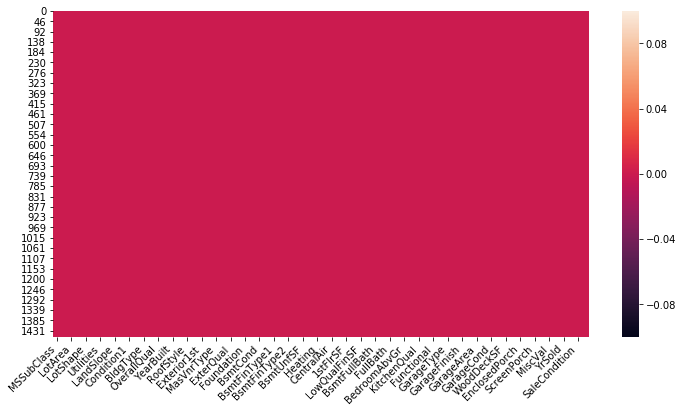

In [21]:
# Confirm by ploting heatmap , there is no missing vakue 

plt.figure(figsize=(12, 6))
ax = sns.heatmap(train.isnull())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
#ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');
plt.show()

In [6]:
import seaborn as sns

# Divide the train data in two groups - Numeriacl and Categorical features 

cat_features = list(train.select_dtypes(include = ["object"]).columns) # categorical features
num_features = list(train.select_dtypes(exclude = ["object"]).columns) # numerical features

train_num = train[num_features]
train_cat = train[cat_features]



In [7]:
# Do the Analysis of Numerical Features - Find out which are Numerical having outliers

In [8]:
features = [ 'LotArea','MasVnrArea' , 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea','GarageArea','OpenPorchSF','EnclosedPorch','SalePrice']
#set(train_num.columns) - set(features)
print('Below are Numerical Features in train_num Dataframe')
features

Below are Numerical Features in train_num Dataframe


['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice']

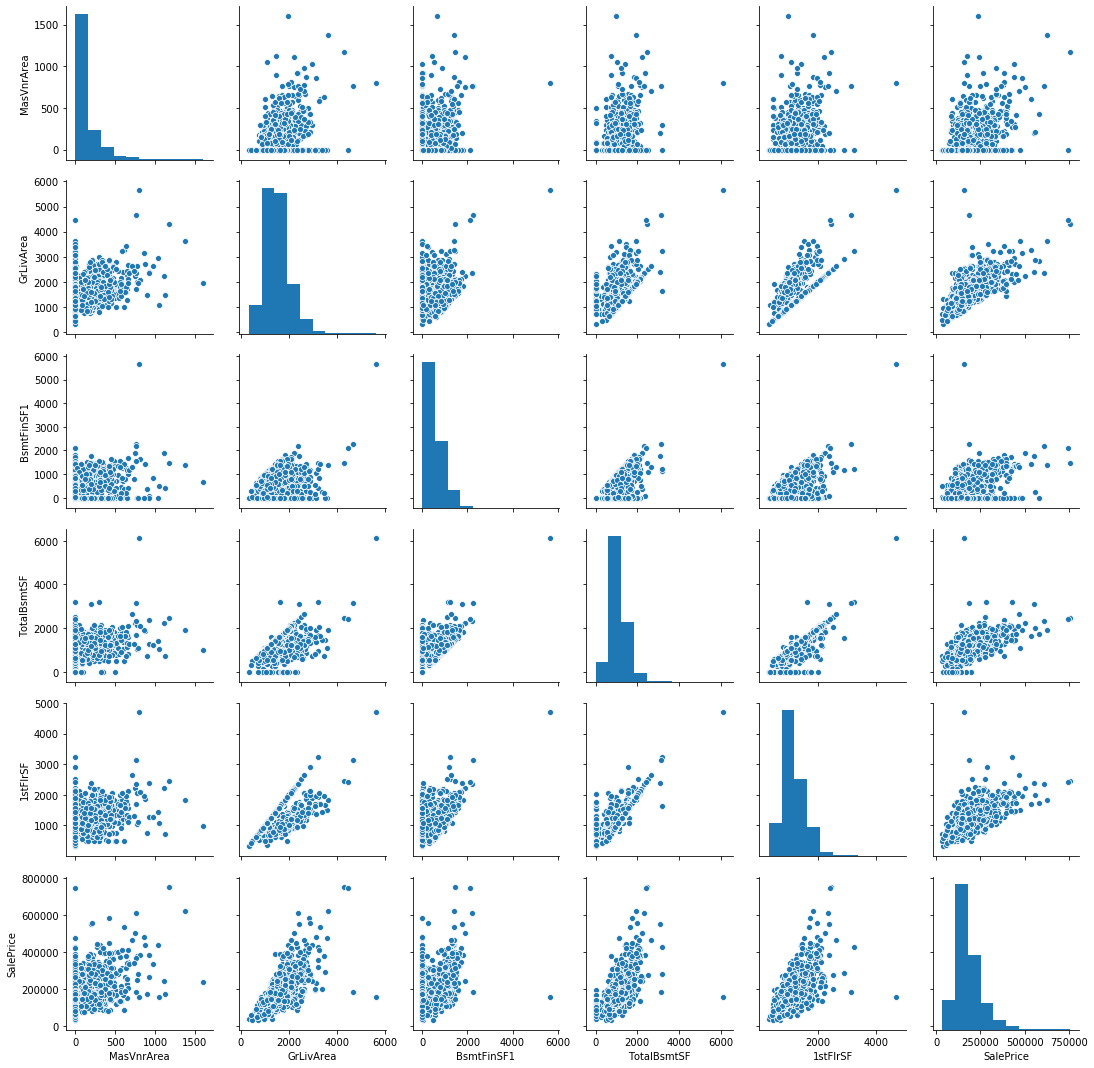

In [10]:
# Outliers Identification for Numerical Features - Plot Box Plot With Target Variable 
train_num = train[num_features]
features_pair2 = [ 'MasVnrArea', 'GrLivArea', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF','SalePrice']
sns.pairplot(train[features_pair2], size = 2.5)
plt.show()

In [11]:
# From the above pairplot we can clearly see that 'MasVnrArea', 'GrLivArea', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF' 
# Contails Outliers
# We Can Remove these Outliers 


train.drop(train[(train['MasVnrArea'] > 1500)].index, inplace = True)
train.drop(train[(train['GrLivArea'] > 4000)].index, inplace = True)
train.drop(train[(train['BsmtFinSF1'] > 4000)].index, inplace = True)
train.drop(train[(train['TotalBsmtSF'] > 4000)].index, inplace = True)
train.drop(train[(train['1stFlrSF'] > 4000)].index, inplace = True)

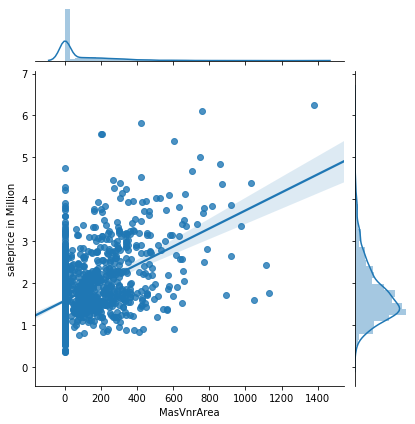

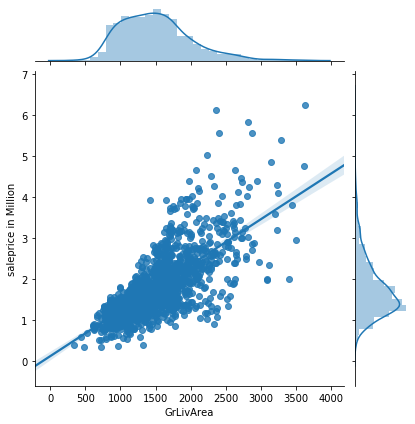

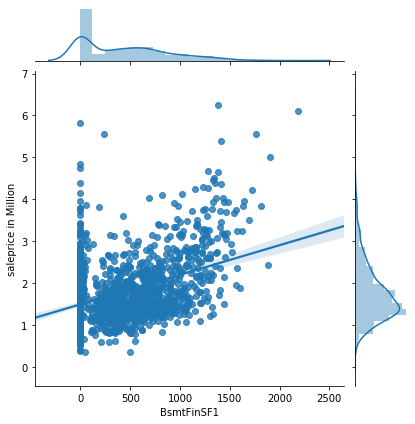

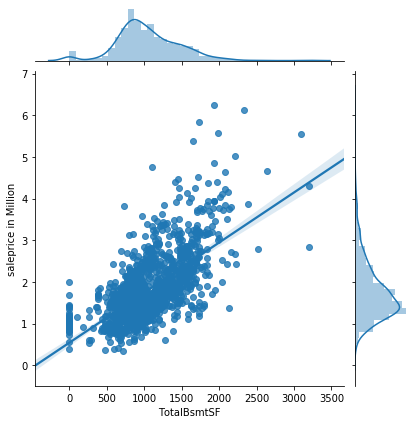

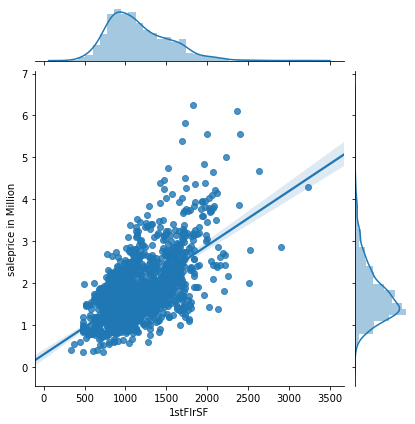

In [12]:
# Visualize the joint plot with above Features to confirm 

features = ['MasVnrArea', 'GrLivArea', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF']

for feature in features :
    sns.jointplot(x=train[feature], y = (train['SalePrice'])/100000, data=train, kind='reg')
    plt.ylabel('saleprice in Million')
    plt.show()

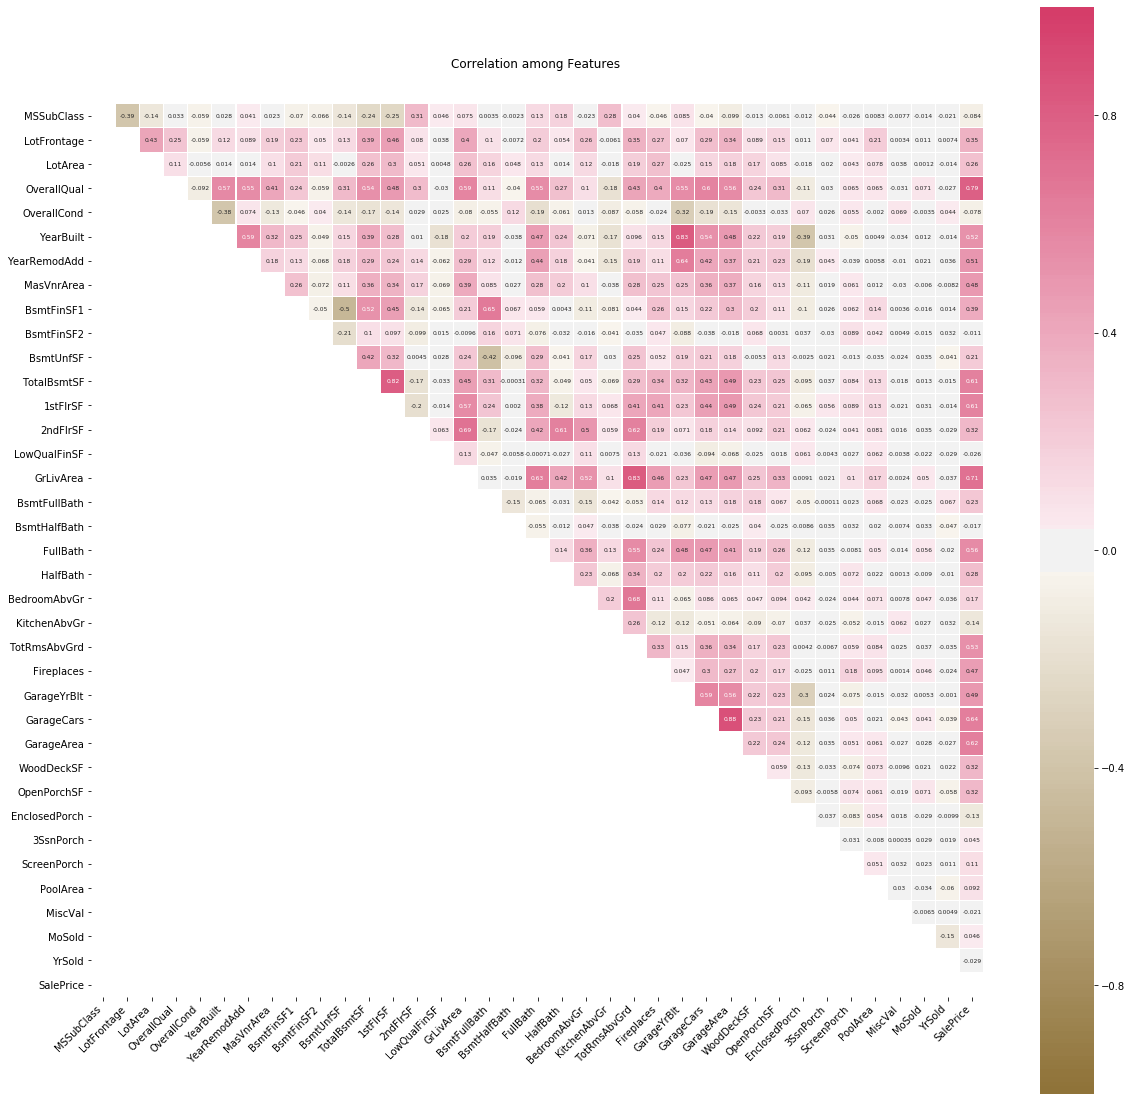

In [22]:
# We Will Do the Multivariate Analysis On Train Data 
# We Can Plot Heat Map to see the covarience between the Features 


matrix = np.tril(train_num.corr())
plt.figure(figsize = (20,20))
ax = sns.heatmap(train_num.corr(),#.sort_values(by=['SalePrice']), 
                 linewidths=0.1, 
                 vmin=-1, 
                 vmax=1, 
                 center=0, 
                 annot = True,
                 #square = True, 
                 #fmt ='.2f', 
                 annot_kws = {'size': 6},
                 cmap=sns.diverging_palette( 60, 360, n=200), 
                 square=True,
                 mask=matrix)
#ax = sns.heatmap(train_num.corr(), linewidths=0.1, vmin=-1, vmax=1, center=0, cmap=plt.cm.viridis, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');

plt.title("Correlation among Features \n\n")
plt.show()

In [41]:
# From the above Plot We can see the corelation between Feature & target Variable 
# We will Take Threshold Values 0.4 [ Consider Features grether than value 0.4 ]

train_num.corr()[train_num.corr()['SalePrice'] > 0.4]['SalePrice'].sort_values(ascending=False)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

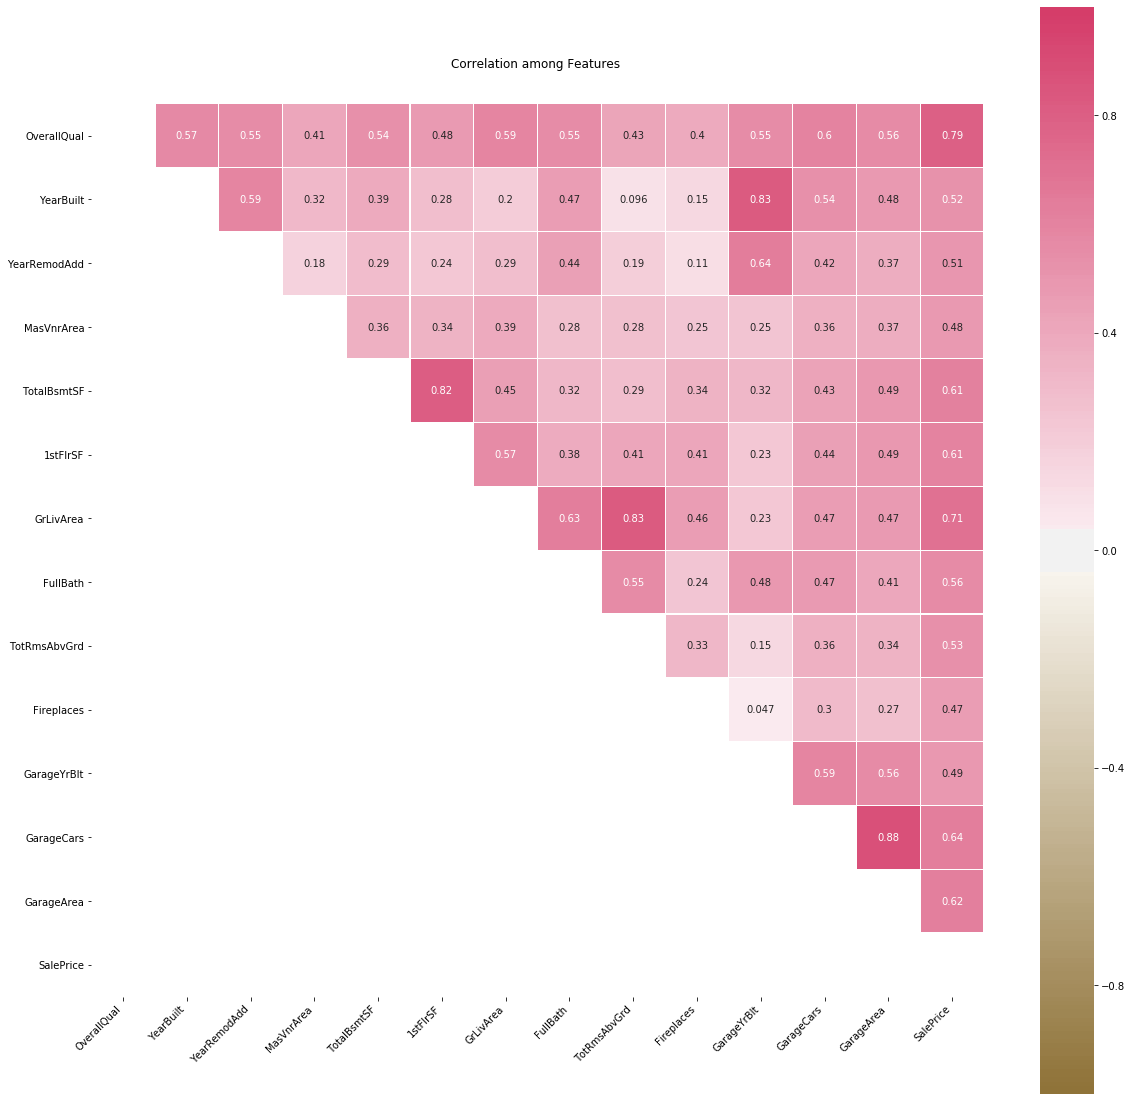

In [84]:
# Plot the Heatmap of the Features that are highly ralated with target Variable

t = train_num.corr()[train_num.corr()['SalePrice'] > 0.4].index
matrix = np.tril(train_num[list(t.index)].corr())
plt.figure(figsize = (20,20))
ax = sns.heatmap(train_num[list(t.index)].corr(),#.sort_values(by=['SalePrice']), 
                 linewidths=0.1, 
                 vmin=-1, 
                 vmax=1, 
                 center=0, 
                 annot = True,
                 #square = True, 
                 #fmt ='.2f', 
                 annot_kws = {'size': 10},
                 cmap=sns.diverging_palette( 60, 360, n=200), 
                 square=True,
                 mask=matrix)
#ax = sns.heatmap(train_num.corr(), linewidths=0.1, vmin=-1, vmax=1, center=0, cmap=plt.cm.viridis, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');

plt.title("Correlation among Features \n\n")
plt.show()

In [81]:
# Now its time to Check Colinearity Among the Features 
# We would set Threshold greter than 0.8 for colinear 

#1.YearBuilt and GarageYrBlt 
#2.GarageArea and GarageCars 
#3.GrLivArea and TotRmsAbvGrd 
#4.TotalBsmtSF and 1stFlrSF
#                                are colinear so we will choose one who has high corelation with target variable 

#train_num.corr()[(train_num.corr() > 0.8) & (train_num.corr() < 1)]['TotalBsmtSF']


Unwanted_features = ['GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF']

for Unwanted_feature in Unwanted_features:
    train.drop(Unwanted_feature, axis = 1, inplace = True)


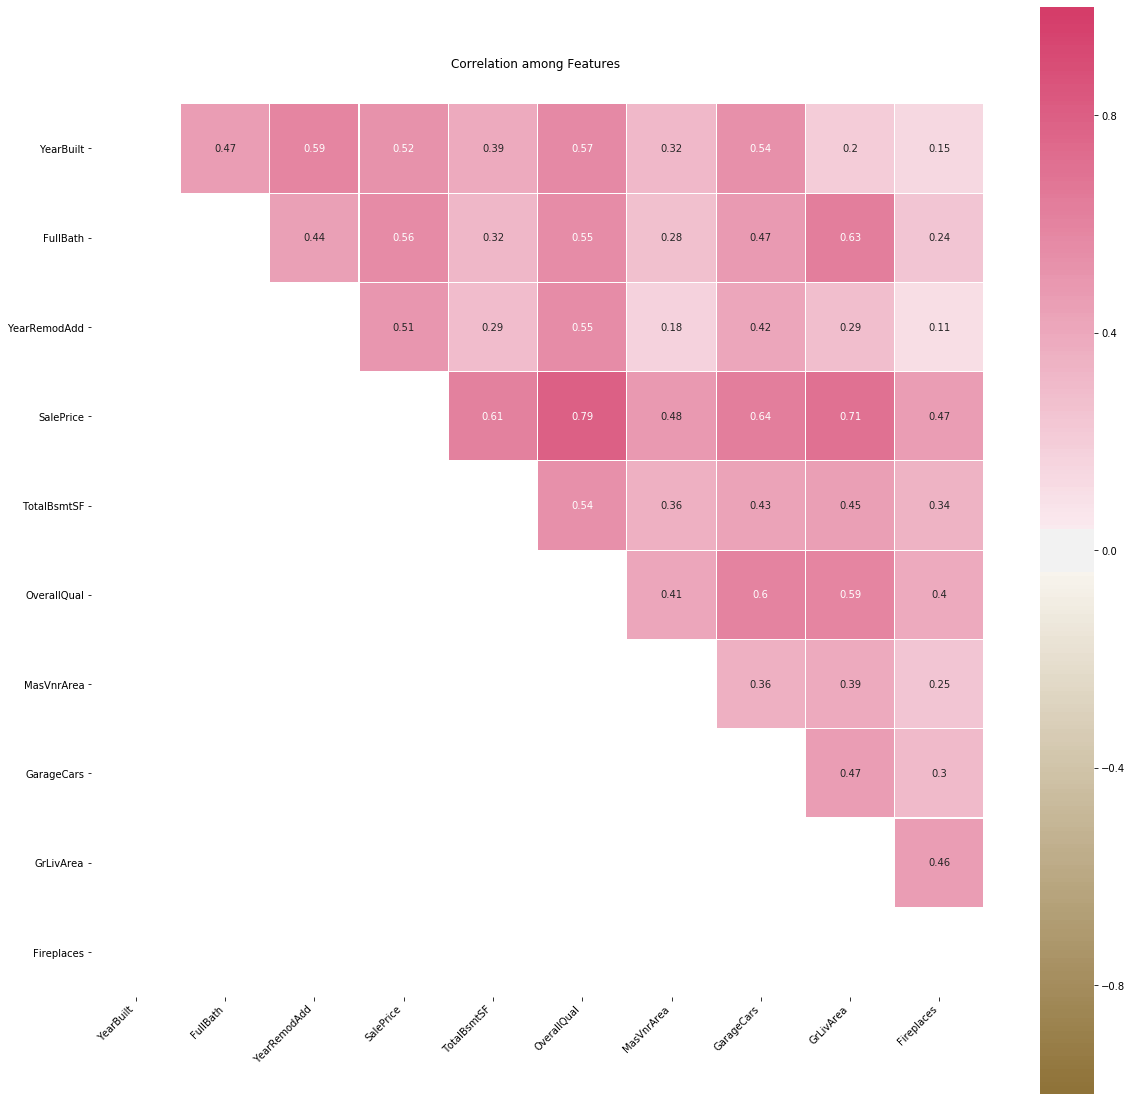

In [91]:
# Plot the Heatmap of the Features that are highly ralated with target Variable

t = list(set(train_num.corr()[train_num.corr()['SalePrice'] > 0.4].index) - set(Unwanted_features))
matrix = np.tril(train_num[list(t)].corr())
plt.figure(figsize = (20,20))
ax = sns.heatmap(train_num[list(t)].corr(),#.sort_values(by=['SalePrice']), 
                 linewidths=0.1, 
                 vmin=-1, 
                 vmax=1, 
                 center=0, 
                 annot = True,
                 #square = True, 
                 #fmt ='.2f', 
                 annot_kws = {'size': 10},
                 cmap=sns.diverging_palette( 60, 360, n=200), 
                 square=True,
                 mask=matrix)
#ax = sns.heatmap(train_num.corr(), linewidths=0.1, vmin=-1, vmax=1, center=0, cmap=plt.cm.viridis, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right');

plt.title("Correlation among Features \n\n")
plt.show()